In [1]:
"""Header cell, contains modules and functions to make the whole notebook experience better"""
%matplotlib inline 
# plots graphs within the notebook

from IPython.display import display,Image, Latex
from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')
from IPython.display import clear_output

import time

from IPython.display import display,Image, Latex

from IPython.display import clear_output


import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.constants as sc


import sympy as sym

    
font = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 12,
        }
fontlabel = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 12,
        }

from matplotlib.ticker import FormatStrFormatter
plt.rc('font', **font)

class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
    

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.constants as sc


import sympy as sym


from math import sin, cos

class Robot(object):
    """Defines basic mobile robot properties"""
    def __init__(self):
        self.pos_x  = 0.0
        self.pos_y  = 0.0
        self.angle  = 0.0
        self.plot   = False
        self._delta = 0.01
        self.step_plot = int(5)
        self.mag_plot = 1.

    # Movement
    def step(self):
        """ updates the x,y and angle """
        self.deltax()
        self.deltay()
        self.deltaa()

    def move(self, seconds):
        """ Moves the robot for an 's' amount of seconds"""
        for i in range(int(seconds/self._delta)):
            self.step()
            if i % self.step_plot == 0 and self.plot: # plot path every 3 steps
                self.plot_xya()

    # Printing-and-plotting:
    def print_xya(self):
        """ prints the x,y position and angle """
        print ("x = " + str(self.pos_x) +" "+ "y = " + str(self.pos_y))
        print ("a = " + str(self.angle))

    def plot_robot(self):
        """ plots a representation of the robot """
        plt.arrow(self.pos_x, self.pos_y, 0.001
                  * cos(self.angle), 0.001 * sin(self.angle),
                  head_width=self.mag_plot*self.length, head_length=self.mag_plot*self.length,
                  fc='k', ec='k')

    def plot_xya(self):
        """ plots a dot in the position of the robot """
        plt.scatter(self.pos_x, self.pos_y, c='r', edgecolors='r')


class DDRobot(Robot):
    """Defines a differential drive robot"""

    def __init__(self):
        Robot.__init__(self)
        self.radius = 0.1
        self.length = 0.4

        self.rt_spd_left = 0.0
        self.rt_spd_right = 0.0

    def deltax(self):
        """ update x depending on l and r angular speeds """
        self.pos_x += self._delta * (self.radius*0.5) \
        * (self.rt_spd_right + self.rt_spd_left)*cos(self.angle)

    def deltay(self):
        """ update y depending on l and r angular speeds """
        self.pos_y += self._delta * (self.radius*0.5) \
        * (self.rt_spd_right + self.rt_spd_left)*sin(self.angle)

    def deltaa(self):
        """ update z depending on l and r angular speeds """
        self.angle += self._delta * (self.radius/self.length) \
        * (self.rt_spd_right - self.rt_spd_left)
# function to convert degrees to radians
def D2R(a):
    return math.pi*a/180
def R2D(a):
    return 180*a/math.pi
# mybot = DDRobot()            # robot called 'enesbot'

# mybot.angle = 3.1416/4        # 45 degrees
# mybot.plot = True             # plot the robot!
# mybot.plot_robot()

# mybot.rt_spd_left = 10
# mybot.rt_spd_right = 10       # straight line
# mybot.move(2)                 # move for 2 seconds

# mybot.rt_spd_left = 12.5664
# mybot.rt_spd_right = 18.8496  # (2m diameter circle)
# mybot.move(1)                 # move for 1 second

# mybot.rt_spd_left = 18.8496
# mybot.rt_spd_right = 12.5664  # (2m diameter circle)
# mybot.move(2.5)               # move for 2.5 second

# mybot.rt_spd_left = 12.5664
# mybot.rt_spd_right = 18.8496  # (2m diameter circle)
# mybot.move(3.5)               # move for 2.5 second

# mybot.plot_robot()

# plt.xlim([-1, 6])               # axis limits
# plt.ylim([-1, 6])

# plt.show()

In [3]:
PDF('bot-sketch.pdf',size = (550,400))

# Differential Drive Robot - 2: Calibration

Alphabot 2 is a differential drive robot: Two independent motors drive the left and right wheels and the differential speed between the two wheels control the speed and direction of the robot. The following code is copied from http://enesbot.me/kinematic-model-of-a-differential-drive-robot.html

## Objective
The objective is to investigate methods of calibration of the robot. 

## Quick Theoretical Background

The robot parameters are:
<ul>
    <li> Wheel radius: $r$. </li>
    <li> Length between wheels: $L$ </li>
    <li> Angular velocity of the left and right wheels: $\omega_L$, $\omega_R$, respectively.</li>
    <li> Angle from horizontal: $\alpha$.</li>
    <li> Position vector of the robot: $(x,y)$.</li>
    <li> Velocity vector of the robot: $V=(\dot{x},\dot{y})$.</li>
</ul>
Hereafter $\dot{a}$ refers to the time derivative of variable $a$:

$$
\dot{a}=\frac{da}{dt}
$$

The velocities of the wheels are therefore defined as:

$$
V_L=\omega_Lr\text{ and }V_R=\omega_Rr.
$$

The velocity of the robot, taken at the center of the wheels, is simply:

$$
\vec{V}=\frac{V_R+V_L}{2}(\cos(\alpha)\vec{e}_x+\sin(\alpha\vec{e}_y),
$$

yielding the following equations of motions:

$$
\dot{x}=r\frac{\omega_R+\omega_L}{2}\cos{\alpha}
$$

$$
\dot{y}=r\frac{\omega_R+\omega_L}{2}\sin{\alpha}
$$

and

$$
\dot{\alpha}=\frac{r}{L}(\omega_R-\omega_L)
$$

In the previous assignment, an equation was derived to determine the time $T$ needed to turn the robot an angle $\alpha_o$ at given rotation speed $\omega_L$ and $\omega_R$ and robot dimensions $r$ and $L$. This equation started by intergrating the robot angle equation above:

$$
\dot{\alpha}=\frac{d\alpha}{dt}=\frac{r}{L}(\omega_R-\omega_L)
$$

from $0$ to a time $T$ yields

$$
\int_0^T\frac{d\alpha}{dt}dt=\int_0^T\frac{r}{L}(\omega_R-\omega_L)dt
$$

Since the left hand side function is constant with respect to time, the result is simply:

$$
\alpha(T) - \alpha(0) =Tr\frac{\omega_R-\omega_L}{L}
$$

Therefore the time to execute a rotation of angle $\alpha_o=\alpha(T) - \alpha(0)$ is

$$
T = \frac{\alpha_oL}{r(\omega_R-\omega_L)}.\;\;\;\mathrm{Eq. 1}
$$


## Position of the Problem
In a perfect world if your code sets the same rotation speed for both wheels, the robot travels on a straight line. In the present case of independent motors, this outcome is very unlikely. Actually one should not expect the robot to drive straight. Below is a model of drift. Here the drift has two components: a constant drift (it could be a signal offset issue), and complex mechanical friction modeled by a quadratic function of the rotation speed. You will assume that you don't know the equation of the drift.

## Goal
You will derive a calibration curve using polynomial fit and test your calibration on a specific motion.


## Example of drift

Below is a code showing the trajectory of a robot for a series of 5 runs at different rotation speeds $\omega=1, 2.5, 5, 7.5, 10$. The robot starts from the same initial conditions, $x=0,y=0,\alpha=0$, has no drift (perfect robot) and moves for 10 s for all runs.

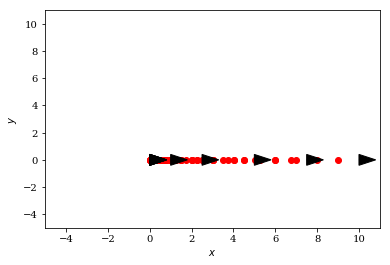

In [4]:
T = 10
omega = np.array([1, 2.5, 5, 7.5, 10])
end_angle = np.zeros(5)
omega_R = omega 
omega_L = omega
mybot = DDRobot()
mybot.mag_plot = 2 #coefficient of magnification of the arrow
mybot.step_plot = 100 # plot location every 100 iterations

for i in range(5):
    mybot.pos_x = 0 #x
    mybot.pos_y = 0 #y
    mybot.angle = D2R(0) #alpha
    mybot.length =0.4 #L
    mybot.radius = 0.1 #r
    mybot.rt_spd_left = omega_L[i]
    mybot.rt_spd_right = omega_R[i]


    mybot.plot = True #True if you want to plot the robot's trajectory
    mybot.plot_robot() #draw an arrow for the location of the robot at t=0

    mybot.move(T) #move the robot for 10s
    mybot.plot_robot() #draw the new location
    end_angle[i] = mybot.angle

plt.xlim(-5,11)
plt.ylim(-5,11)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

Now we introduce a constant random drift $\delta$ and see its effect on the different trajectories. The function numpy.random.rand returns a random number between 0 and 1.

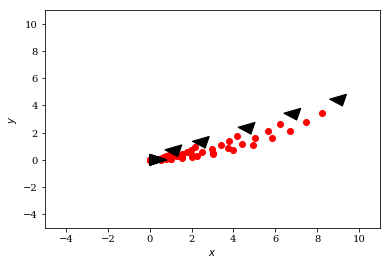

In [6]:
delta = np.random.rand(1)
T = 10
omega = np.array([1, 2.5, 5, 7.5, 10])
end_angle = np.zeros(5)
omega_R = omega + delta[0]
omega_L = omega
mybot = DDRobot()
mybot.mag_plot = 2 #coefficient of magnification of the arrow
mybot.step_plot = 100 # plot location every 100 iterations

for i in range(5):
    mybot.pos_x = 0 #x
    mybot.pos_y = 0 #y
    mybot.angle = D2R(0) #alpha
    mybot.length =0.4 #L
    mybot.radius = 0.1 #r
    mybot.rt_spd_left = omega_L[i]
    mybot.rt_spd_right = omega_R[i]


    mybot.plot = True #True if you want to plot the robot's trajectory
    mybot.plot_robot() #draw an arrow for the location of the robot at t=0

    mybot.move(T) #move the robot for 10s
    mybot.plot_robot() #draw the new location
    end_angle[i] = mybot.angle

plt.xlim(-5,11)
plt.ylim(-5,11)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

The plot below shows the angle at the end of each run. Based on Eq. 1 above, does this plot make sense?

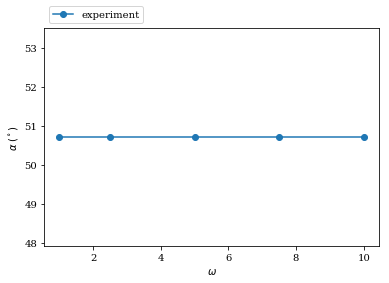

In [7]:
plt.plot(omega,R2D(end_angle),'o-',label="experiment")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$\alpha\;(^\circ)$ ")
plt.legend(loc=3, bbox_to_anchor=[0, 1.], ncol=2, shadow=False, fancybox=True)
plt.show()

The correction is straightforward. For each run, the rotation speed of the right wheel must be corrected by $-\delta$.

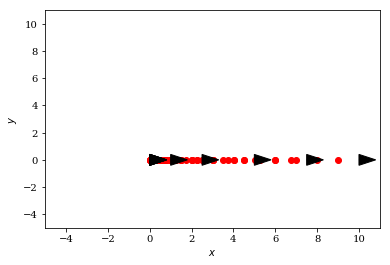

In [8]:

T = 10
omega = np.array([1, 2.5, 5, 7.5, 10])
end_angle = np.zeros(5)
mybot = DDRobot()
mybot.mag_plot = 2 #coefficient of magnification of the arrow
mybot.step_plot = 100 # plot location every 100 iterations

for i in range(5):
    mybot.pos_x = 0 #x
    mybot.pos_y = 0 #y
    mybot.angle = D2R(0) #alpha
    mybot.rt_spd_left = omega_L[i]
    mybot.rt_spd_right = omega_R[i] - delta[0]


    mybot.plot = True #True if you want to plot the robot's trajectory
    mybot.plot_robot() #draw an arrow for the location of the robot at t=0

    mybot.move(T) #move the robot for 10s
    mybot.plot_robot() #draw the new location
    end_angle[i] = mybot.angle

plt.xlim(-5,11)
plt.ylim(-5,11)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

## Proposed calibration

You will assume that the drift $\delta$ is caused by the right motor and additive:

$$
\omega_L = \omega,\;\omega_R = \omega+\delta(\omega).
$$

If $\delta(\omega)$ is positive, the robot, when programmed to go straight, the robot will actually turn left.

The proposed calibration consists of programming the robot for a series of straight runs for various $\omega$ and constant $T$, $r$ and $L$. Once the robot stops, the deviation from the straight motion is measured by the angle of the robot at time $T$. This angle is a function of $\omega$, $\alpha(\omega)$ if the drift is a function of the rotation speed. Use Eq. 1 above to determine the drift $\delta(\omega)$ as a function of $\alpha(\omega)$, $L$, $T$ and $r$.

In [9]:
""" random quadratic drift equation. Note that every time 
you run this cell, the trajectories will change"""
a = np.random.random(2)# random drift amplitude
print(a)
def drift(omega):
    f = a[0] + a[1] * (omega/5)**2
    return f

[0.03285105 0.15091591]


### Uncalibrated robot

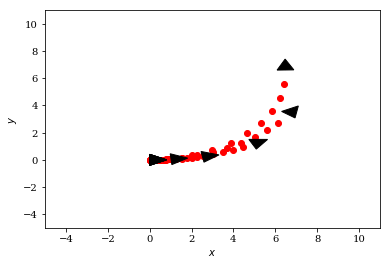

In [10]:
T = 10
omega = np.array([1, 2.5, 5, 7.5, 10])
end_angle = np.zeros(5)
omega_R = omega + drift(omega)
omega_L = omega
mybot = DDRobot()
mybot.mag_plot = 2 #coefficient of magnification of the arrow
mybot.step_plot = 100 # plot location every 100 iterations

for i in range(5):
    mybot.pos_x = 0 #x
    mybot.pos_y = 0 #y
    mybot.angle = D2R(0) #alpha
    mybot.length =0.4 #L
    mybot.radius = 0.1 #r
    mybot.rt_spd_left = omega_L[i]
    mybot.rt_spd_right = omega_R[i]


    mybot.plot = True #True if you want to plot the robot's trajectory
    mybot.plot_robot() #draw an arrow for the location of the robot at t=0

    mybot.move(T) #move the robot for 10s
    mybot.plot_robot() #draw the new location
    end_angle[i] = mybot.angle

plt.xlim(-5,11)
plt.ylim(-5,11)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

Note in the code above, the angle at the end of the motion is stored in the array end_angle. As shown below, the drift appears to follow a parabola.

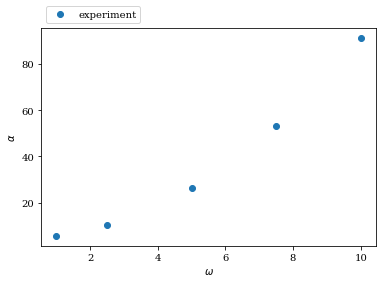

In [11]:
plt.plot(omega,R2D(end_angle),'o',label="experiment")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$\alpha$")
plt.legend(loc=3, bbox_to_anchor=[0, 1.], ncol=2, shadow=False, fancybox=True)
plt.show()

Let's now fit a quadratic polynomial to these points. The creation of a polynomial in python is shown below using numpy polyfit function. p2_coef are the coefficients $p_i$ of the polynomial $p(x)=p_0x^2+p_1x+p_2$ (see https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.polyfit.html).

In [12]:
p2_coef = np.polyfit(omega,end_angle,2)
print(p2_coef)

[ 1.50915907e-02 -4.78006585e-15  8.21276361e-02]


To generate a function, use the numpy function poly1d:

In [13]:
p2 = np.poly1d(p2_coef)
p2 = np.poly1d(np.polyfit(omega,end_angle,2)) #equivalent compact form
p2

poly1d([ 1.50915907e-02, -4.78006585e-15,  8.21276361e-02])

You can now generate a fit over a range of your choice, here $0\leq\omega\leq10$

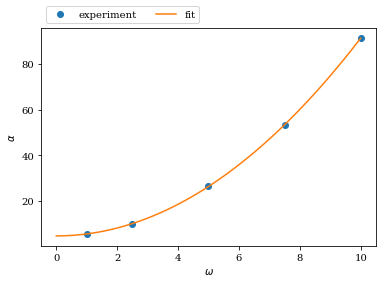

In [14]:
N = 51
om = np.linspace(0,10,N)

plt.plot(omega,R2D(end_angle),'o',label="experiment")
plt.plot(om,R2D(p2(om)),label='fit')
plt.xlabel(r"$\omega$")
plt.ylabel(r"$\alpha$")
plt.legend(loc=3, bbox_to_anchor=[0, 1.], ncol=2, shadow=False, fancybox=True)
plt.show()


In Eq. 1, introduce the drift at $\delta$, i.e. $\omega_L=\omega$ and $\omega_R=\omega+\delta$, and derive a correction for the drift at as a function of $\alpha(\omega)$, which here is the array end_angle or the polynomial p2. Using the knowledge of the drift for all 5 rotation speed in the array omega, create a polynomial to compute the drift for $\omega\in[0,10]$ and introduce this polynomial into the code below to correct for the drift.



In [28]:
delta = mybot.length/(mybot.radius*T)*end_angle
print(end_angle)
print(mybot.length/(mybot.radius*T))
print(delta)
print(R2D(p2(2)))

[ 0.34574835  0.9517579   4.88811036  5.34589337  7.02843155]
[ 2.          1.33333333  1.          2.          1.33333333]
[  0.69149669   1.26901054   4.88811036  10.69178675   9.37124206]
107.370677846


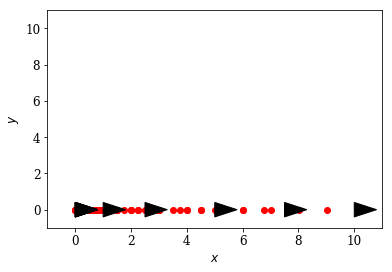

In [24]:
omega = np.array([1, 2.5, 5, 7.5, 10])
end_angle = np.zeros(5)
omega_L = omega 
omega_R = omega + drift(omega) # DO NOT MODIFY
mybot = DDRobot()
mybot.mag_plot = 2 #coefficient of magnification of the arrow
mybot.step_plot = 100 # plot location every 100 iterations

for i in range(5):
    mybot.pos_x = 0 #x
    mybot.pos_y = 0 #y
    mybot.angle = D2R(0) #alpha
    mybot.length =0.4 #L
    mybot.radius = 0.1 #r
    mybot.rt_spd_left = omega_L[i]
    mybot.rt_spd_right = omega_R[i] - delta[i] #write your correction here


    mybot.plot = True #True if you want to plot the robot's trajectory
    mybot.plot_robot() #draw an arrow for the location of the robot at t=0

    mybot.move(10) #move the robot for 10s
    mybot.plot_robot() #draw the new location
    end_angle[i] = mybot.angle

plt.xlim(-1,11)
plt.ylim(-1,11)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

Now apply your correction to the following example. In this example the robot experiences 5 step motions of different durations and speed. The robot is supposed to move in a straight line. Print the angle of the robot at the end of each step. Does your correction work? What would it take the correction to work for positive AND negative rotation speed?

Write your answers here.

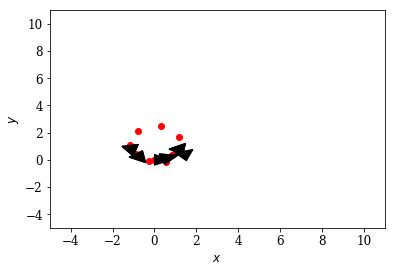

In [26]:
omega = np.array([1.5, 2.4, 10, 3 , 7])
T = np.array([2, 3, 4, 2, 3])
end_angle = np.zeros(5)
omega_L = omega 
omega_R = omega + drift(omega)
mybot = DDRobot()
mybot.mag_plot = 2 #coefficient of magnification of the arrow
mybot.step_plot = 100 # plot location every 100 iterations
mybot.pos_x = 0 #x
mybot.pos_y = 0 #y
mybot.angle = D2R(0) #alpha
mybot.length =0.4 #L
mybot.radius = 0.1 #r
for i in range(5):
    
    mybot.rt_spd_left = omega_L[i]
    mybot.rt_spd_right = omega_R[i] # write your correction here

    mybot.plot = True #True if you want to plot the robot's trajectory
    mybot.plot_robot() #draw an arrow for the location of the robot at t=0

    mybot.move(T[i]) #move the robot for 10s
    mybot.plot_robot() #draw the new location
    end_angle[i] = mybot.angle

plt.xlim(-5,11)
plt.ylim(-5,11)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

In [ ]:
print(R2D(end_angle))

Create a complex motion (with rotations and speed variations). Show the result with and without correction. At minimum the motion should include one rotation and two different wheel rotation speed. See example below 

In [ ]:
Nmoves = 2 # make sure to increase this number if you increase the number of moves
omega = np.array([6, 9])
T = np.array([12,8])
rotation_angle = np.array([90, 90])
rotation_angle = D2R(rotation_angle)
end_angle = np.zeros(Nmoves) 
omega_L = omega 
omega_R = omega + drift(omega)
t_rotation = rotation_angle*mybot.length/(mybot.radius*(omega_R+omega_L))
mybot = DDRobot()
mybot.mag_plot = 2 #coefficient of magnification of the arrow
mybot.step_plot = 100 # plot location every 100 iterations
mybot.pos_x = 0 #x
mybot.pos_y = 0 #y
mybot.angle = D2R(0) #alpha
mybot.length =0.4 #L
mybot.radius = 0.1 #r
mybot.plot = True #True if you want to plot the robot's trajectory
mybot.plot_robot() #draw an arrow for the location of the robot at t=0
for i in range(Nmoves):
    
    mybot.rt_spd_left = omega_L[i]
    mybot.rt_spd_right = omega_R[i] # write your correction here

    mybot.move(T[i]) #move the robot
    # rotation 
    mybot.rt_spd_left = -omega_L[i]
    mybot.rt_spd_right = omega_R[i] # write your correction here
    mybot.move(t_rotation[i]) #move the robot
    mybot.plot_robot() #draw the new location
    end_angle[i] = mybot.angle

plt.xlim(-5,11)
plt.ylim(-5,11)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()